In [1]:
import warnings; warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
plt.rcParams["pdf.fonttype"]=42
plt.rcParams["font.size"]=14
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.transparent"] = False
plt.rcParams["axes.spines.right"]=False
plt.rcParams["axes.spines.top"]=False
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.alpha"] = 0.1
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["text.usetex"] = False

import seaborn as sns
sns.set_palette("deep")
import json

wharton_colors = json.load(open("wharton-colors-distinct.json", "r"))
wharton_pal = sns.color_palette(wharton_colors.values())
sns.set_palette(wharton_pal)
# set matplotlib color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=wharton_pal)

import numpy as np
import pandas as pd
import os
import pickle

from permutation_helpers import random_data_gen

from scipy.stats import norm
def auc_from_maha(maha_dist: float):
    # source: https://en.wikipedia.org/wiki/Sensitivity_index#RMS_sd_discriminability_index
    auc = norm.cdf(maha_dist / np.sqrt(2))
    return auc

maha_values = np.linspace(0., 1.5, 5)

## 2D Mahalanobis distance

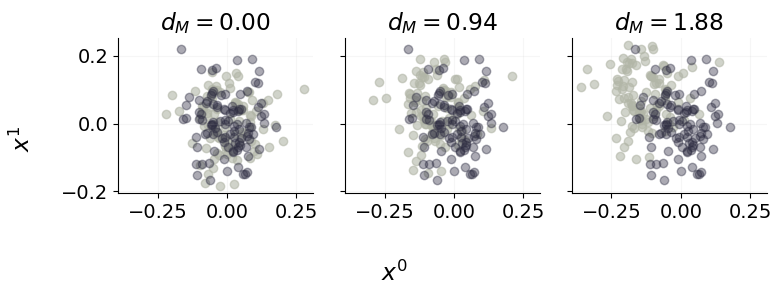

In [2]:
fig, ax = plt.subplots(1, 3, figsize=(8, 3), sharey=True, sharex=True)
ax = ax.ravel()
for i, m in enumerate(np.linspace(0., 1.875, 3)):
    X, y = random_data_gen(n_samples=200, n_feats=2, maha=m, seed=56)
    ax[i].scatter(X[y, 0], X[y, 1], alpha=.6, color=wharton_pal[1])
    ax[i].scatter(X[~y, 0], X[~y, 1], alpha=.4, color=wharton_pal[4])
    ax[i].set_title(f"$d_M={m:.2f}$")
fig.supxlabel(r"$x^0$")
fig.supylabel(r"$x^1$")
plt.tight_layout()
plt.savefig("figures/2D_maha_viz.pdf", bbox_inches="tight")

## Load Simulation Data
Collect files from individual runs and concatenate, saving complete set of results

In [2]:
testsize = None
for m in maha_values.round(2):
    settings = pickle.load(open(f"settings/testsize_params_maha_{m:.1f}.pkl", "rb"))
    nsim = settings["sim"]["n_sim"]
    results_dir = settings["file"]["results_dir"]
    param_range = settings["sim"]["parameter_range"]
    for p in param_range:
        for i in range(nsim):
            try:
                score, null = pd.read_pickle(os.path.join(results_dir, f"post_testsize_{p:.4f}_simno_{i:05}.pkl"))
                testsize_post = pd.merge(pd.DataFrame(score, index=[i]), 
                                        pd.DataFrame(null, i+np.zeros(len(null)).astype(int)).add_prefix("null_"), left_index=True, right_index=True)
                score, null = pd.read_pickle(os.path.join(results_dir, f"pre_testsize_{p:.4f}_simno_{i:05}.pkl"))
                testsize_pre = pd.merge(pd.DataFrame(score, index=[i]), 
                                        pd.DataFrame(null, i+np.zeros(len(null)).astype(int)).add_prefix("null_"), left_index=True, right_index=True)
                testsize_pre['test'] = "pre"; testsize_post['test'] = "post"
                testsize_pre['d'] = m; testsize_post['d'] = m
                testsize_pre['param'] = p; testsize_post['param'] = p
                testsize = pd.concat([testsize, testsize_pre, testsize_post])
            except FileNotFoundError: # some errors when only one class is present
                print(f"File not found: param={p}, simno={i}, maha={m}")
testsize = testsize.reset_index(names = "simno")
testsize.to_pickle("testsize.pkl")
testsize['param'] = testsize['param'].round(3)


File not found: param=0.01, simno=336, maha=0.0
File not found: param=0.01, simno=456, maha=0.0
File not found: param=0.01, simno=336, maha=0.38
File not found: param=0.01, simno=456, maha=0.38
File not found: param=0.01, simno=336, maha=0.75
File not found: param=0.01, simno=456, maha=0.75


In [ ]:
samplesize = None
for m in maha_values.round(2):
    settings = pickle.load(open(f"settings/samplesize_params_maha_{m:.1f}.pkl", "rb"))
    nsim = settings["sim"]["n_sim"]
    results_dir = settings["file"]["results_dir"]
    param_range = settings["sim"]["parameter_range"]
    for p in param_range:
        for i in range(nsim):
            try:
                score, null = pd.read_pickle(os.path.join(results_dir, f"post_samplesize_{p:.4f}_simno_{i:05}.pkl"))
                samplesize_post = pd.merge(pd.DataFrame(score, index=[i]), 
                                        pd.DataFrame(null, i+np.zeros(len(null)).astype(int)).add_prefix("null_"), left_index=True, right_index=True)
                score, null = pd.read_pickle(os.path.join(results_dir, f"pre_samplesize_{p:.4f}_simno_{i:05}.pkl"))
                samplesize_pre = pd.merge(pd.DataFrame(score, index=[i]), 
                                        pd.DataFrame(null, i+np.zeros(len(null)).astype(int)).add_prefix("null_"), left_index=True, right_index=True)
                samplesize_pre['test'] = "pre"; samplesize_post['test'] = "post"
                samplesize_pre['d'] = m; samplesize_post['d'] = m
                samplesize_pre['param'] = p; samplesize_post['param'] = p
                samplesize = pd.concat([samplesize, samplesize_pre, samplesize_post])
            except FileNotFoundError: # some errors when only one class is present
                print(f"File not found: param={p}, simno={i}, maha={m}")
samplesize = samplesize.reset_index(names = "simno")
samplesize.to_pickle("samplesize.pkl")
samplesize['param'] = samplesize['param'].round(3)

In [ ]:
nfeats = None
for m in maha_values.round(2):
    settings = pickle.load(open(f"settings/nfeats_params_maha_{m:.1f}.pkl", "rb"))
    nsim = settings["sim"]["n_sim"]
    results_dir = settings["file"]["results_dir"]
    param_range = settings["sim"]["parameter_range"]
    for p in param_range:
        for i in range(nsim):
            try:
                score, null = pd.read_pickle(os.path.join(results_dir, f"post_nfeats_{p:.4f}_simno_{i:05}.pkl"))
                nfeats_post = pd.merge(pd.DataFrame(score, index=[i]), 
                                        pd.DataFrame(null, i+np.zeros(len(null)).astype(int)).add_prefix("null_"), left_index=True, right_index=True)
                score, null = pd.read_pickle(os.path.join(results_dir, f"pre_nfeats_{p:.4f}_simno_{i:05}.pkl"))
                nfeats_pre = pd.merge(pd.DataFrame(score, index=[i]), 
                                        pd.DataFrame(null, i+np.zeros(len(null)).astype(int)).add_prefix("null_"), left_index=True, right_index=True)
                nfeats_pre['test'] = "pre"; nfeats_post['test'] = "post"
                nfeats_pre['d'] = m; nfeats_post['d'] = m
                nfeats_pre['param'] = p; nfeats_post['param'] = p
                nfeats = pd.concat([nfeats, nfeats_pre, nfeats_post])
            except FileNotFoundError: # some errors when only one class is present
                print(f"File not found: param={p}, simno={i}, maha={m}")
nfeats = nfeats.reset_index(names = "simno")
nfeats.to_pickle("nfeats.pkl")
nfeats['param'] = nfeats['param'].round(3)

In [ ]:
ratio = None
for m in maha_values.round(2):
    settings = pickle.load(open(f"settings/ratio_params_maha_{m:.1f}.pkl", "rb"))
    nsim = settings["sim"]["n_sim"]
    results_dir = settings["file"]["results_dir"]
    param_range = settings["sim"]["parameter_range"]
    for p in param_range:
        for i in range(nsim):
            try:
                score, null = pd.read_pickle(os.path.join(results_dir, f"post_ratio_{p:.4f}_simno_{i:05}.pkl"))
                ratio_post = pd.merge(pd.DataFrame(score, index=[i]), 
                                        pd.DataFrame(null, i+np.zeros(len(null)).astype(int)).add_prefix("null_"), left_index=True, right_index=True)
                score, null = pd.read_pickle(os.path.join(results_dir, f"pre_ratio_{p:.4f}_simno_{i:05}.pkl"))
                ratio_pre = pd.merge(pd.DataFrame(score, index=[i]), 
                                        pd.DataFrame(null, i+np.zeros(len(null)).astype(int)).add_prefix("null_"), left_index=True, right_index=True)
                ratio_pre['test'] = "pre"; ratio_post['test'] = "post"
                ratio_pre['d'] = m; ratio_post['d'] = m
                ratio_pre['param'] = p; ratio_post['param'] = p
                ratio = pd.concat([ratio, ratio_pre, ratio_post])
            except FileNotFoundError: # some errors when only one class is present
                print(f"File not found: param={p}, simno={i}, maha={m}")
ratio = ratio.reset_index(names = "simno")
ratio.to_pickle("ratio.pkl")
ratio['param'] = ratio['param'].round(3)

### Compute p-values

In [3]:
for parameter in ["testsize", "samplesize", "nfeats", "ratio"]:
    print(f"Running {parameter}")
    long_data = pd.read_pickle(f"{parameter}.pkl")
    long_data['param'] = long_data['param'].round(3)
    for metric in ["roc_auc", "accuracy", "brier_score", "log_loss"]:
        print(f"Evaluating {metric}")
        long_data['null_exceeds_score'] = (long_data[f'null_{metric}'] >= long_data[metric]).astype(int)
        agg_data = long_data.groupby(["d", "param", "test", "simno"])\
            .agg({"null_exceeds_score": lambda x: (x.sum() + 1) / (len(x) + 1)})\
            .reset_index().rename(columns={"null_exceeds_score": "pval"})
        agg_data['positive'] = agg_data['pval'] <= .05
        print("Saving")
        agg_data.to_pickle(f"{parameter}_pval_{metric}.pkl")

Running testsize
Evaluating roc_auc


: 

# Power

In [2]:
metric = "roc_auc"
testsize = pd.read_pickle(f"testsize_pval_{metric}.pkl")
samplesize = pd.read_pickle(f"samplesize_pval_{metric}.pkl")
nfeats = pd.read_pickle(f"nfeats_pval_{metric}.pkl")
ratio = pd.read_pickle(f"ratio_pval_{metric}.pkl")

## Test/Train Split

['$\\lambda$' '0.01' '0.027' '0.071' '0.188' '0.5' 'Test' 'pre' 'post']


/mnt/tmp/489646.1.mem.q/ipykernel_255572/1179206998.py:21: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  ax.legend(


Text(0, 0.5, 'Power ($1-\\beta$)')

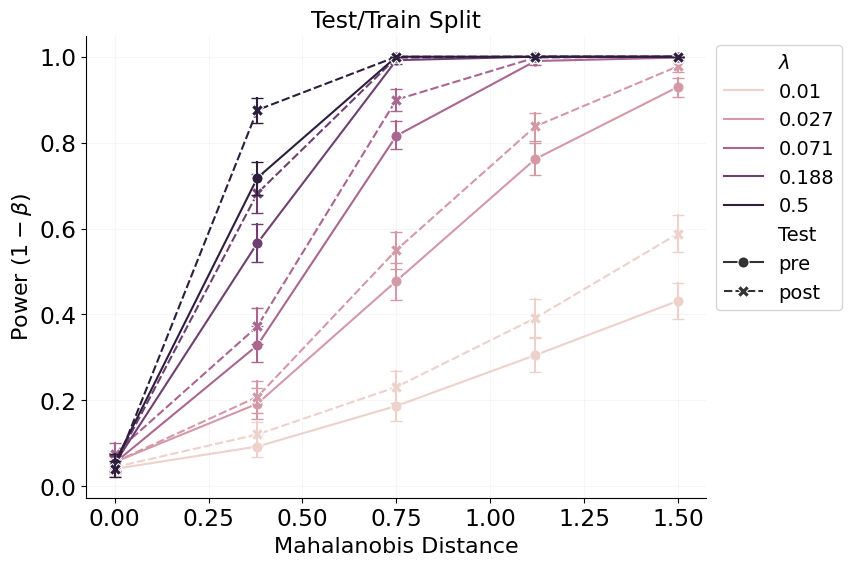

In [5]:
plt.figure(figsize=(8, 6))
ax = sns.lineplot(
    data=testsize,
    x="d",
    y="positive",
    hue="param",
    hue_norm=LogNorm(),
    style="test",
    style_order=["pre", "post"],
    markers=True,
    markersize=8,
    err_style="bars",
    err_kws={"capsize": 4},
)
handles, labels = ax.get_legend_handles_labels()
mask = np.isin(np.array(labels), ["param", "test"])
labels = np.array(labels, dtype=object)
labels[mask] = ["$\\lambda$", "Test"]
print(labels)
labels = list(labels)
ax.legend(
    "upper right",
    bbox_to_anchor=(1, 1),
    title=None,
    handles=handles,
    labels=labels,
)
ax.tick_params(labelsize="large")
ax.set_title("Test/Train Split")
ax.set_xlabel(r"Mahalanobis Distance")
ax.set_ylabel(r"Power ($1-\beta$)")
# plt.savefig("figures/test-train-split-power.pdf", bbox_inches='tight')

## Sample Size

Text(0, 0.5, 'Power ($1-\\beta$)')

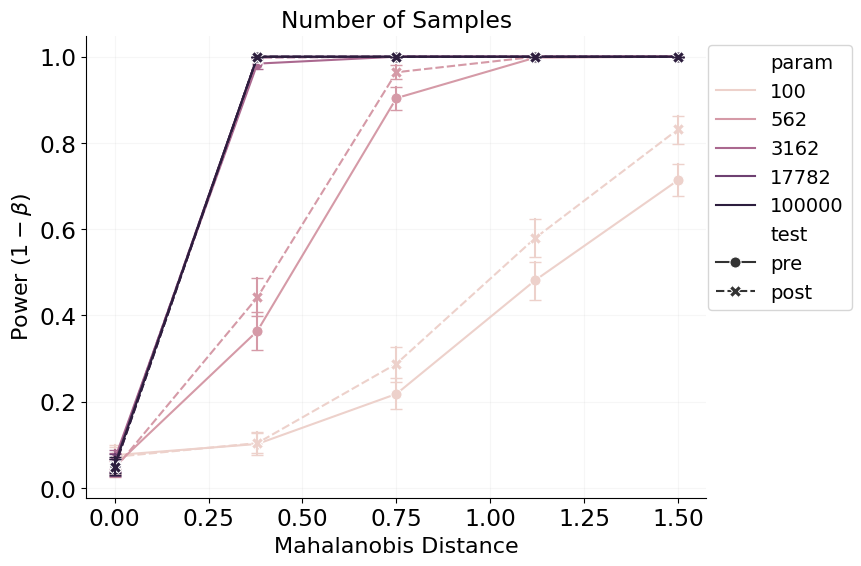

In [8]:
plt.figure(figsize=(8, 6))
ax = sns.lineplot(
    data=samplesize,
    x="d",
    y="positive",
    hue="param",
    hue_norm=LogNorm(),
    style="test",
    style_order=["pre", "post"],
    markers=True,
    markersize=8,
    err_style="bars",
    err_kws={"capsize": 4},
)
ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
ax.tick_params(labelsize="large")
ax.set_title("Number of Samples")
ax.set_xlabel(r"Mahalanobis Distance")
ax.set_ylabel(r"Power ($1-\beta$)")
# plt.savefig("figures/samplesize-power.pdf", bbox_inches='tight')

## Number of Features

Text(0, 0.5, 'Power ($1-\\beta$)')

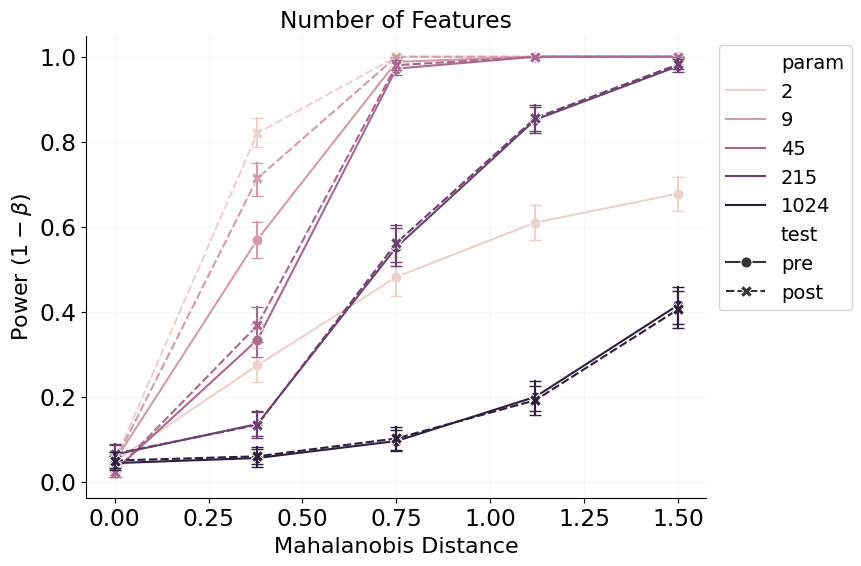

In [9]:
plt.figure(figsize=(8, 6))
ax = sns.lineplot(
    data=nfeats,
    x="d",
    y="positive",
    hue="param",
    hue_norm=LogNorm(),
    style="test",
    style_order=["pre", "post"],
    markers=True,
    markersize=8,
    err_style="bars",
    err_kws={"capsize": 4},
)
ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
ax.tick_params(labelsize="large")
ax.set_title("Number of Features")
ax.set_xlabel(r"Mahalanobis Distance")
ax.set_ylabel(r"Power ($1-\beta$)")
# plt.savefig("figures/nfeats-power.pdf", bbox_inches="tight")

## Class Balance Ratio

Text(0, 0.5, 'Power ($1-\\beta$)')

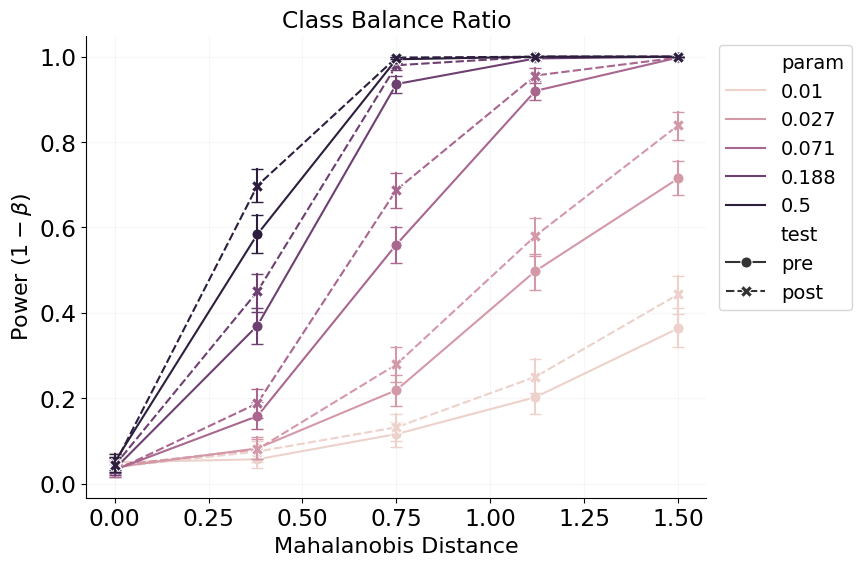

In [11]:
plt.figure(figsize=(8, 6))
ax = sns.lineplot(
    data=ratio,
    x="d",
    y="positive",
    hue="param",
    hue_norm=LogNorm(),
    style="test",
    style_order=["pre", "post"],
    markers=True,
    markersize=8,
    err_style="bars",
    err_kws={"capsize": 4},
)
ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
ax.tick_params(labelsize="large")
ax.set_title("Class Balance Ratio")
ax.set_xlabel(r"Mahalanobis Distance")
ax.set_ylabel(r"Power ($1-\beta$)")
# plt.savefig("figures/ratio-power.pdf", bbox_inches='tight')

# Type I error

## Test/Train Split

Text(0.5, 0, 'Test Proportion')

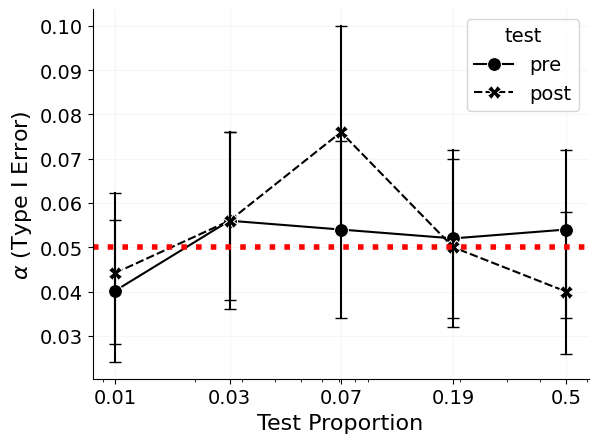

In [17]:
# only care about data under the null hypothesis (no class separation)
ax = sns.lineplot(
    data=testsize.query("d==0."),
    x="param",
    y="positive",
    style="test",
    style_order=["pre", "post"],
    markers=True,
    markersize=10,
    color="k",
    err_style="bars",
    err_kws={"capsize": 4},
)
ax.axhline(0.05, color="red", ls=":", lw=4)
plt.xscale("log")
plt.xticks(null_testsize["param"].unique(), null_testsize["param"].unique().round(2))
plt.ylabel(r"$\alpha$ (Type I Error)")
plt.xlabel(r"Test Proportion")
# plt.savefig("figures/test-train-split-bias.pdf", bbox_inches='tight')

## Sample Size

Text(0.5, 0, 'Number of Samples')

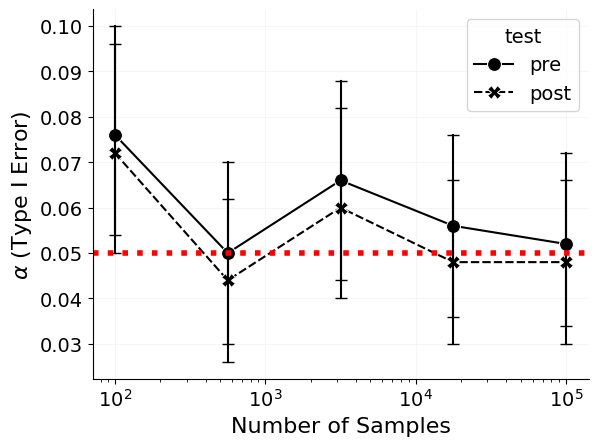

In [18]:
ax = sns.lineplot(
    data=samplesize.query("d==0."),
    x="param",
    y="positive",
    style="test",
    style_order=["pre", "post"],
    markers=True,
    markersize=10,
    color="k",
    err_style="bars",
    err_kws={"capsize": 4},
)
ax.axhline(0.05, color="red", ls=":", lw=4)
plt.xscale("log")
plt.ylabel(r"$\alpha$ (Type I Error)")
plt.xlabel(r"Number of Samples")
# plt.savefig("figures/samplesize-bias.pdf", bbox_inches='tight')

## Number of Features

Text(0.5, 0, 'Number of Features')

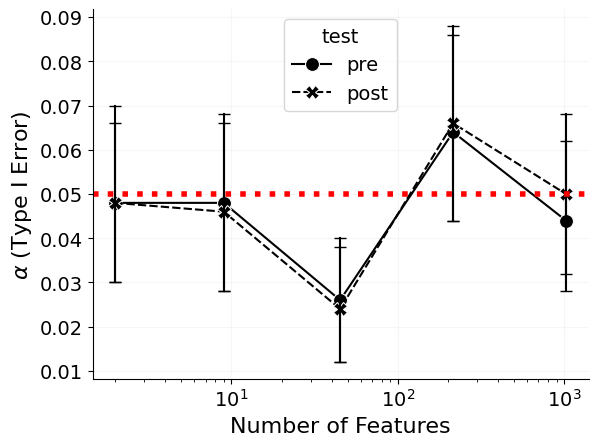

In [19]:
null_nfeats = nfeats.query("d==0.")
ax = sns.lineplot(
    data=null_nfeats,
    x="param",
    y="positive",
    style="test",
    style_order=["pre", "post"],
    markers=True,
    markersize=10,
    color="k",
    err_style="bars",
    err_kws={"capsize": 4},
)
ax.axhline(0.05, color="red", ls=":", lw=4)
plt.xscale("log")
plt.ylabel(r"$\alpha$ (Type I Error)")
plt.xlabel(r"Number of Features")
# plt.savefig("figures/nfeats-bias.pdf", bbox_inches='tight')

## Class Balance Ratio

Text(0.5, 0, 'Class Balance Ratio')

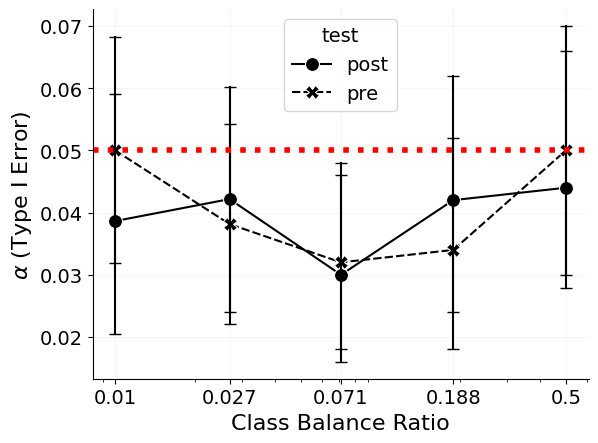

In [21]:
ax = sns.lineplot(data=ratio.query("d==0."), x="param", y="positive", style='test', markers=True, markersize=10, color='k',
                  err_style="bars", err_kws={"capsize":4})
ax.axhline(.05, color='red', ls=':', lw=4)
plt.xscale("log")
ax.set_xticks(ratio['param'].unique())
ax.set_xticklabels(ratio['param'].unique())
plt.ylabel(r"$\alpha$ (Type I Error)")
plt.xlabel(r"Class Balance Ratio")
# plt.savefig("figures/ratio-bias.pdf", bbox_inches='tight')

# Runtime analysis

In [71]:
runtime = pd.read_pickle("sim_results/simulate_runtime.pkl").reset_index()

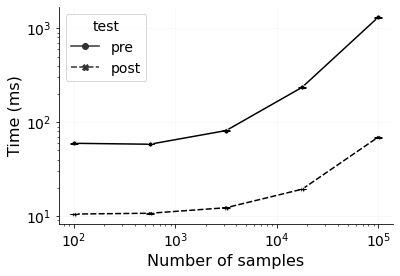

In [72]:
ax = sns.lineplot(data=runtime, x="param", y="value", style='test', markers=True, markersize=5, color='k',
                  err_style="bars", err_kws={"capsize":4})
ax.set_xlabel("Number of samples")
ax.set_ylabel("Time (ms)")
plt.xscale("log")
plt.yscale("log")
plt.savefig("figures/runtime.pdf", bbox_inches='tight')

# Are we over-fitting or under-fitting?

In [22]:
maha = nfeats.query("param==100")
expected_auc = auc_from_maha(np.unique(maha["d"]))

In [24]:
ax = sns.pointplot(data=maha, x="d", y="roc_auc_score", hue='test', label="Actual AUC")
ax.plot(expected_auc, color='red', ls='--', marker='o', label = "Expected AUC")
ax.set_xlabel("Mahalanobis distance")
ax.set_ylabel("AUC")
plt.grid(True, alpha=0.1)
# plt.legend()
# sns.pointplot(data=null_scores, x="param", y="mean")

ValueError: Could not interpret value `roc_auc_score` for `y`. An entry with this name does not appear in `data`.

## Other